<a href="https://colab.research.google.com/github/sandeep92134/PYTHON-Data-Cleaning/blob/master/Chapter%204/Exersize%205.%20Using%20linear%20regression%20to%20identify%20data%20points%20with%20significant%20influence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
>>> import pandas as pd
>>> import matplotlib.pyplot as plt
>>> import statsmodels.api as sm
>>> covidtotals = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%204/datasets/covidtotals.csv")
>>> covidtotals.set_index("iso_code", inplace=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# create an analysis file
>>> xvars = ['pop_density','median_age','gdp_per_capita']
>>> covidanalysis = covidtotals.loc[:,['total_cases_pm'] + xvars].dropna()
>>> covidanalysis.describe()

,total_cases_pm,pop_density,median_age,gdp_per_capita
count,175.000000,175.000000,175.000000,175.000000
mean,1134.015709,247.151863,30.537143,19008.385423
std,2101.363772,822.398967,9.117751,19673.386571
min,0.000000,1.980000,15.100000,661.240000
25%,67.448000,36.066000,22.300000,4458.202500
50%,263.413000,82.328000,29.700000,12951.839000
75%,1357.506000,207.960000,38.700000,27467.146000
max,19753.146000,7915.731000,48.200000,116935.600000


In [3]:
# fit a linear regression model
def getlm(df):
  Y = df.total_cases_pm
  X = df[['pop_density','median_age','gdp_per_capita']]
  X = sm.add_constant(X)
  return sm.OLS(Y, X).fit()

lm = getlm(covidanalysis)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_cases_pm   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     61.81
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           4.06e-27
Time:                        12:07:20   Log-Likelihood:                -1522.4
No. Observations:                 175   AIC:                             3053.
Df Residuals:                     171   BIC:                             3065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            944.4731    426.712      2.213      0.028     102.172    1786.774
pop_density       -0.2057      0.142     -1.447      0.150      -0.486       0.075
median_age       -49.4398     16.013     -3.088      0.002     -81.048     -17.832
gdp_per_capita     0.0921      0.008     12.015      0.000       0.077       0.107
==============================================================================
Omnibus:                      105.361   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1182.641
Skew:                           1.967   Prob(JB):                    1.56e-257
Kurtosis:                      15.113   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# identify countries with an outsized influence on the model
influence = lm.get_influence().summary_frame()
influence.loc[influence.cooks_d>0.5, ['cooks_d']]

,cooks_d
iso_code,
HKG,0.780662
QAT,5.080180


In [5]:
covidanalysis.loc[influence.cooks_d>0.5]

,total_cases_pm,pop_density,median_age,gdp_per_capita
iso_code,,,,
HKG,0.000,7039.714,44.8,56054.92
QAT,19753.146,227.322,31.9,116935.60


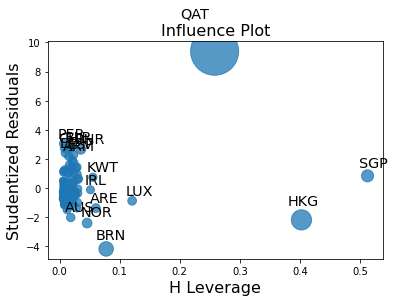

In [8]:
# do an influence plot
fig, ax = plt.subplots()
sm.graphics.influence_plot(lm, ax = ax, criterion="cooks")
plt.show()

In [9]:
# show a model without the outliers
covidanalysisminusoutliers = covidanalysis.loc[influence.cooks_d<0.5]

lm = getlm(covidanalysisminusoutliers)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_cases_pm   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     46.56
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           5.52e-22
Time:                        12:10:32   Log-Likelihood:                -1464.8
No. Observations:                 173   AIC:                             2938.
Df Residuals:                     169   BIC:                             2950.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             44.0854    349.924      0.126      0.900    -646.700     734.870
pop_density        0.2423      0.145      1.666      0.098      -0.045       0.529
median_age        -2.5165     13.526     -0.186      0.853     -29.217      24.184
gdp_per_capita     0.0557      0.007      7.875      0.000       0.042       0.070
==============================================================================
Omnibus:                       53.262   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.935
Skew:                           1.347   Prob(JB):                     1.22e-27
Kurtosis:                       6.152   Cond. No.                     1.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""